In [1]:
import numpy as np
from numpy import sqrt
from scipy import constants
from matplotlib import pyplot as plt

import lattices, particles, solver

EV = constants.e/constants.h

### Honeycomb lattice
Set up subwavelength honeycomb lattice with lattice constant $a_0 = 15\sqrt{3}~\mathrm{nm}$ and spherical silver NPs with $r = 5~\mathrm{nm}$.

In [2]:
honeycomb = lattices.Honeycomb(lattice_constant = 15E-9 * sqrt(3))
sphere = particles.Particle(radius = 5E-9, height = 5E-9)

grid = 128
f_min, f_max = 3.1*EV, 3.6*EV
f_range = np.linspace(f_min, f_max, grid)
system = solver.Interaction(honeycomb, sphere)
honeycomb_spfn = system.spectral_function(f_range)

spectral function: t = 1.63s


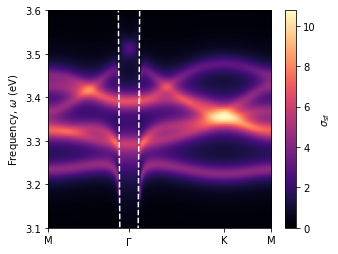

In [3]:
fig, ax = plt.subplots(1, figsize = (5, 4))

im = ax.imshow(honeycomb_spfn/(5E-9)**2, origin='lower', extent = [0, grid-1, f_min/EV, f_max/EV], 
               aspect='auto', cmap='magma', vmin = 0)
cbar = fig.colorbar(im)
cbar.set_label(r'$\sigma_\mathrm{sf}$')

bz = honeycomb.get_brillouin_zone(grid)
light_line = constants.c * np.array([np.linalg.norm(k_par) for k_par in bz])/(2*np.pi)
ax.plot(light_line/EV, c='w', ls='--')

labels = honeycomb.get_bz_labels(grid)
ax.set_xticks(list(labels.keys()))
ax.set_xticklabels(labels.values())

ax.set_xlim(0, grid-1)

ax.set_ylim(f_min/EV, f_max/EV)
ax.set_ylabel(r'Frequency, $\omega$ (eV)')

plt.show()

### Kagome lattice

Let the lattice constant $a_0 = 50\sqrt{3}~\mathrm{nm}$ We will use spheroidal NPs to split the in-plane and out-of-plane modes, and only plot the out-of-plane modes, $r = 10~\mathrm{nm}$ and $h = 20~\mathrm{nm}$.

In [4]:
kagome = lattices.Kagome(lattice_constant = 50E-9 * sqrt(3))
sphere = particles.Particle(radius = 10E-9, height = 20E-9)

grid = 128
f_min, f_max = 2.6*EV, 3.2*EV
f_range = np.linspace(f_min, f_max, grid)

system = solver.Interaction(kagome, sphere)
kagome_spfn = system.spectral_function(f_range)

spectral function: t = 2.22s


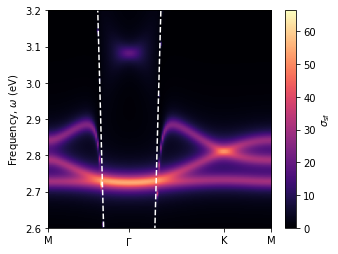

In [5]:
fig, ax = plt.subplots(1, figsize = (5, 4))

im = ax.imshow(kagome_spfn/(10E-9)**2, origin='lower', extent = [0, grid-1, f_min/EV, f_max/EV], 
               aspect='auto', cmap='magma', vmin = 0)
cbar = fig.colorbar(im)
cbar.set_label(r'$\sigma_\mathrm{sf}$')

bz = kagome.get_brillouin_zone(grid)
light_line = constants.c * np.array([np.linalg.norm(k_par) for k_par in bz])/(2*np.pi)
ax.plot(light_line/EV, c='w', ls='--')

labels = kagome.get_bz_labels(grid)
ax.set_xticks(list(labels.keys()))
ax.set_xticklabels(labels.values())

ax.set_xlim(0, grid-1)

ax.set_ylim(f_min/EV, f_max/EV)
ax.set_ylabel(r'Frequency, $\omega$ (eV)')

plt.show()

### Square lattice
Note we choose very subwavelength parameters: $r = 5$ nm and $a_0 = 15$ nm.

In [6]:
square = lattices.Square(lattice_constant = 15E-9)
sphere = particles.Particle(radius = 5E-9, height = 5E-9)

grid = 128
f_min, f_max = 3.1*EV, 3.6*EV

f_range = np.linspace(f_min, f_max, grid)
system = solver.Interaction(square, sphere)
square_spfn = system.spectral_function(f_range)

spectral function: t = 1.33s


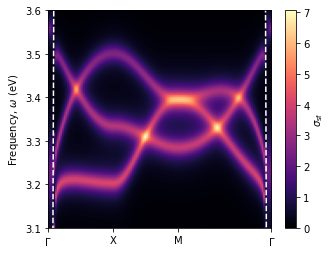

In [7]:
fig, ax = plt.subplots(1, figsize = (5, 4))

im = ax.imshow(square_spfn/(5E-9)**2, origin='lower', extent = [0, grid-1, f_min/EV, f_max/EV], 
                aspect='auto', cmap='magma', vmin = 0)
cbar = fig.colorbar(im)
cbar.set_label(r'$\sigma_\mathrm{sf}$')

bz = square.get_brillouin_zone(grid)
light_line = constants.c * np.array([np.linalg.norm(k_par) for k_par in bz])/(2*np.pi)
ax.plot(light_line/EV, c='w', ls='--')

labels = square.get_bz_labels(grid)
ax.set_xticks(list(labels.keys()))
ax.set_xticklabels(labels.values())

ax.set_xlim(0, grid-1)

ax.set_ylim(f_min/EV, f_max/EV)
ax.set_ylabel(r'Frequency, $\omega$ (eV)')

plt.show()

### Surface lattice resonances

When the lattice constant approaches the incident wavelength, we deviate away from approximately tight-binding models and approach the surface lattice resonance (SLR) regime.

Set up a square lattice with $a_0 = 200$ nm and $r = 20$ nm.

In [8]:
square = lattices.Square(lattice_constant = 400E-9)
sphere = particles.Particle(radius = 20E-9, height = 20E-9)

grid = 128
f_min, f_max = 3.0*EV, 3.4*EV

f_range = np.linspace(f_min, f_max, grid)

system = solver.Interaction(square, sphere)
square_spfn = system.spectral_function(f_range)

spectral function: t = 1.38s


Higher diffraction orders (shown as cyan) are pushed down and this results in Rayleigh anomalies (sharp features) in the spectral function. These diffraction orders occur at,
$$ |\mathbf{k}_\parallel + \mathbf{G}| = k_m$$

The broad peak corresponds to the plasmonic resonance and the sharp modes are SLRs.

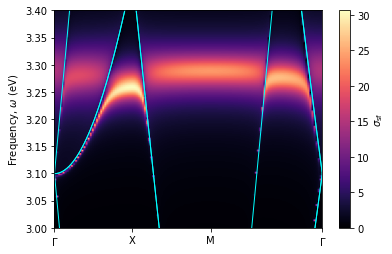

In [9]:
fig, ax = plt.subplots(1, figsize = (6, 4))

im = ax.imshow(square_spfn/(20E-9)**2, origin='lower', extent = [0, grid-1, f_min/EV, f_max/EV], 
                aspect='auto', cmap='magma', vmin = 0)
cbar = fig.colorbar(im)
cbar.set_label(r'$\sigma_\mathrm{sf}$')

b1, b2 = square.get_reciprocal_vectors(square.a1, square.a2)

bz = square.get_brillouin_zone(grid)
for n in np.arange(-1, 2):
    for m in np.arange(-2, 2):
        G = n * b1 + m * b2
        diffraction_order = constants.c * np.array([np.linalg.norm(k_par + G) for k_par in bz])/(2*np.pi)
        if n == 0 and m == 0:
            c = 'lime'
        else:
            c = 'cyan'
        ax.plot(diffraction_order/EV, c=c, ls='-', lw=1)

labels = square.get_bz_labels(grid)
ax.set_xticks(list(labels.keys()))
ax.set_xticklabels(labels.values())

ax.set_xlim(0, grid-1)

ax.set_ylim(f_min/EV, f_max/EV)
ax.set_ylabel(r'Frequency, $\omega$ (eV)')

plt.show()

Typically we look at the spectral function at normal incidence, $\Gamma$, where the sharp SLR and broad localised surface plasmon peak are more clear.

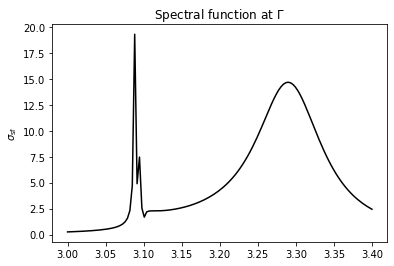

In [10]:
spfn_gamma = square_spfn[:, 0]
f_range = np.linspace(f_min, f_max, grid)

fig, ax = plt.subplots(1)
ax.plot(f_range/EV, spfn_gamma/(20E-9)**2, c='k')

ax.set_label(r'$\omega (eV)$')
ax.set_ylabel(r'$\sigma_\mathrm{sf}$')
ax.set_title(r'Spectral function at $\Gamma$')
plt.show()